In [1]:
import pandas as pd 
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'
import seaborn as sns
import scipy.stats as stats

In [55]:
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import f1_score, roc_curve, roc_auc_score, accuracy_score



In [3]:
df_raw = pd.read_csv('data/bank.csv')
df_raw['JOB'].fillna('Other', inplace = True)
df_raw.fillna(df_raw.mean(), inplace = True)

df_raw_dummy = pd.get_dummies(df_raw)

df_train, df_test = train_test_split(df_raw_dummy, test_size= 0.2, random_state=1234)
print('학습용 데이터의 크기: {}'.format(df_train.shape))
print('평가용 데이터의 크기: {}'.format(df_test.shape))

df_train_y = df_train['BAD']
df_train_x = df_train.drop(columns = 'BAD', inplace = False)
df_test_y = df_test['BAD']
df_test_x = df_test.drop(columns = 'BAD', inplace = False)

학습용 데이터의 크기: (2998, 19)
평가용 데이터의 크기: (750, 19)


C:\Users\User\AppData\Local\Temp/ipykernel_11512/1690711287.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_raw.fillna(df_raw.mean(), inplace = True)


In [4]:
v_feature_name = df_train_x.columns
scalar = StandardScaler()
df_train_scaled_x = scalar.fit_transform(df_train_x)
df_test_scaled_x = scalar.transform(df_test_x)
df_train_scaled_x = pd.DataFrame(df_train_scaled_x, columns = v_feature_name)
df_test_scaled_x = pd.DataFrame(df_test_scaled_x, columns = v_feature_name)

In [94]:
# 평가 저장

model = ['DecisionTree', 'RandomForest', 'GradientBoosting', 'XGBoost', 'SVC', 'KNN', 'Logistic']
train_accuracy = []
test_accuracy = []
model_f1_score = []
model_auc = []

- 의사결정나무

In [95]:
dt_model = DecisionTreeClassifier(random_state= 1234, max_depth = 10, min_samples_leaf=2, min_samples_split= 10)
dt_model.fit(df_train_x, df_train_y)
y_pred = dt_model.predict(df_test_x)

In [96]:
train_accuracy.append(dt_model.score(df_train_x, df_train_y))
test_accuracy.append(dt_model.score(df_test_x, df_test_y))
model_auc.append(roc_auc_score(df_test_y, y_pred))
model_f1_score.append(f1_score(df_test_y, y_pred))

- 랜덤포레스트

In [97]:
rf_model = RandomForestClassifier(n_estimators=10, min_samples_split=20, min_samples_leaf=1, max_depth=70, random_state=1234)
rf_model.fit(df_train_x, df_train_y)
y_pred = rf_model.predict(df_test_x)

In [98]:
train_accuracy.append(rf_model.score(df_train_x, df_train_y))
test_accuracy.append(rf_model.score(df_test_x, df_test_y))
model_auc.append(roc_auc_score(df_test_y, y_pred))
model_f1_score.append(f1_score(df_test_y, y_pred))

- 그라디언트부스팅

In [99]:
gb_final = GradientBoostingClassifier(random_state=1234, max_depth=12, min_samples_split=8, min_samples_leaf=1, learning_rate=0.1, n_estimators=100)
gb_final.fit(df_train_x, df_train_y)
y_pred = gb_final.predict(df_test_x) 

train_accuracy.append(gb_final.score(df_train_x, df_train_y))
test_accuracy.append(gb_final.score(df_test_x, df_test_y))
model_auc.append(roc_auc_score(df_test_y, y_pred))
model_f1_score.append(f1_score(df_test_y, y_pred))

- XGBoost

In [100]:
xgb_final = XGBClassifier(learning_rate = 0.3, booster = 'gbtree', max_depth = 5, n_estimators = 150, gamma = 0, objective = 'binary:logistic', random_state = 1234)
xgb_final.fit(df_train_x, df_train_y)
y_pred = xgb_final.predict(df_test_x)

train_accuracy.append(xgb_final.score(df_train_x, df_train_y))
test_accuracy.append(xgb_final.score(df_test_x, df_test_y))
model_auc.append(roc_auc_score(df_test_y, y_pred))
model_f1_score.append(f1_score(df_test_y, y_pred))

C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:48:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


- SVC

In [101]:
svc_final = SVC(gamma = 0.1, C = 10, random_state=1234)
svc_final.fit(df_train_scaled_x, df_train_y)
y_pred = svc_final.predict(df_test_scaled_x)

train_accuracy.append(svc_final.score(df_train_scaled_x, df_train_y))
test_accuracy.append(svc_final.score(df_test_scaled_x, df_test_y))
model_auc.append(roc_auc_score(df_test_y, y_pred))
model_f1_score.append(f1_score(df_test_y, y_pred))

- KNN

In [102]:
knn_final = KNeighborsClassifier(n_neighbors=3, weights='uniform', metric = 'euclidean')
knn_final.fit(df_train_scaled_x, df_train_y)
y_pred = knn_final.predict(df_test_scaled_x)

train_accuracy.append(knn_final.score(df_train_scaled_x, df_train_y))
test_accuracy.append(knn_final.score(df_test_scaled_x, df_test_y))
model_auc.append(roc_auc_score(df_test_y, y_pred))
model_f1_score.append(f1_score(df_test_y, y_pred))

- 로지스틱회귀 추가

In [103]:
# 로지스틱 회귀모델
from statsmodels.api import Logit

In [104]:
df_train, df_test = train_test_split(df_raw, test_size= 0.2, random_state=1234)

In [105]:
log_model = Logit.from_formula("BAD ~ C(JOB) + DEROG + DELINQ + CLAGE + NINQ + CLNO + DEBTINC", df_train_log)

log_result = log_model.fit()

print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.241170
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 2998
Model:                          Logit   Df Residuals:                     2986
Method:                           MLE   Df Model:                           11
Date:                Thu, 03 Feb 2022   Pseudo R-squ.:                  0.2209
Time:                        14:48:54   Log-Likelihood:                -723.03
converged:                       True   LL-Null:                       -928.08
Covariance Type:            nonrobust   LLR p-value:                 4.385e-81
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -4.9575      0.487    -10.190      0.000      -5.911      -4.004
C(JOB)[T

In [106]:
y_pred = log_result.predict(df_train_log)
y_pred_class = (y_pred > 0.5).astype(int)

train_accuracy.append(accuracy_score(df_train_log['BAD'], y_pred_class))


#평가용 데이터 예측
y_pred = log_result.predict(df_test_log)
y_pred_class = (y_pred > 0.5).astype(int)

test_accuracy.append(accuracy_score(df_test_log['BAD'], y_pred_class))

model_f1_score.append(f1_score(df_test_log['BAD'], y_pred_class))
model_auc.append(roc_auc_score(df_test_log['BAD'], y_pred_class))


In [107]:
# 모델 별 정확도 산출 및 평가

df_eval = pd.DataFrame(index = model)
df_eval['TrainAccuracy'] = train_accuracy
df_eval['TestAccuracy'] = test_accuracy
df_eval['F1Score'] = model_f1_score
df_eval['AUC'] = model_auc
df_eval.round(3)

,TrainAccuracy,TestAccuracy,F1Score,AUC
DecisionTree,0.957,0.935,0.484,0.670
RandomForest,0.957,0.945,0.559,0.696
GradientBoosting,1.000,0.957,0.680,0.758
XGBoost,1.000,0.953,0.646,0.742
SVC,0.987,0.961,0.729,0.794
KNN,0.961,0.937,0.447,0.644
Logistic,0.921,0.928,0.341,0.605


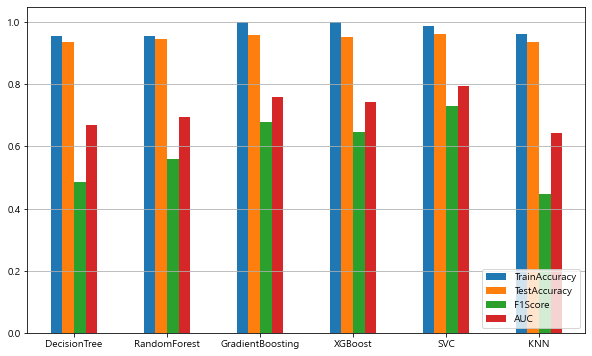

In [42]:
df_eval.plot.bar(rot = 0, figsize = (10, 6))
plt.legend(loc = 'lower right')
plt.grid(axis = 'y')

# 실습

In [108]:
df_tel = pd.read_csv('data/tele_customer.csv')
df_tel['CHURN'].replace({'Active': 0, 'Churned': 1}, inplace = True)
df_tel_dummy = pd.get_dummies(df_tel)
df_tel_y = df_tel_dummy['CHURN']
df_tel_x = df_tel_dummy.drop(columns = 'CHURN')

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_tel_x, df_tel_y, test_size=0.2, random_state=1234)

In [109]:
df_train, df_test = train_test_split(df_tel, test_size= 0.2, random_state=1234)